In [1]:
import pandas as pd

# 주어진 데이터
data = {
    'Height': [150, 160, 170, 175, 165],
    'Weight': [42, 50, 70, 64, 56]
}
df = pd.DataFrame(data)

# 상관계수 계산
correlation = df.corr()

print(correlation)


          Height    Weight
Height  1.000000  0.919509
Weight  0.919509  1.000000


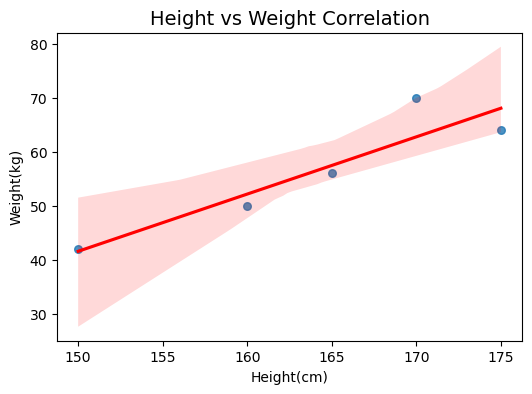

In [2]:
# ------------------------------------------------------
# 시각화
# ------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# 그래프 크기 설정 (가로 6인치, 세로 4인치)
plt.figure(figsize=(6, 4))

# 산점도 + 회귀선 그리기
# scatter_kws={'s':30} → 점 크기 설정
# line_kws={'color':'red'} → 회귀선 색상 빨강으로 설정
sns.regplot(x='Height', y='Weight', data=df, scatter_kws={'s':30}, line_kws={'color':'red'})

# 그래프 제목 추가
plt.title("Height vs Weight Correlation", fontsize=14)

# x축 라벨 지정
plt.xlabel("Height(cm)")

# y축 라벨 지정
plt.ylabel("Weight(kg)")

# 그래프 출력
plt.show()



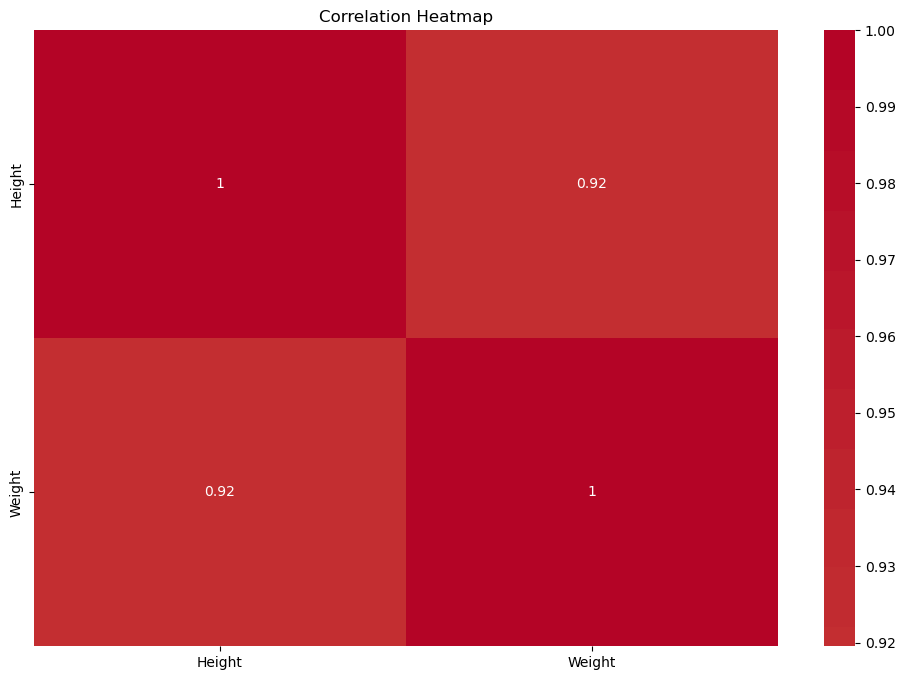

In [3]:
# 히트맵 시각화
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


In [4]:
print(correlation.iloc[0,1])

print(df['키'].corr(df['몸무게']))
print(df['몸무게'].corr(df['키']))

0.9195090879163764


KeyError: '키'

In [ ]:
# ------------------------------------------------------
# 상관계수 종류
# ------------------------------------------------------
# 피어슨 상관계수 (Pearson Correlation) - 기본값
# 연속형 변수 간 '선형 관계(직선적 관계)'를 측정
# 값의 범위: -1 ~ +1 (1에 가까울수록 강한 양의 상관, -1은 강한 음의 상관)
print(df.corr())

# 스피어맨 상관계수 (Spearman Rank Correlation)
# 순위(랭크)에 기반한 상관계수 → 비선형 관계에도 적용 가능(비선형 예시 : 시험 공부 시간(x)이 늘어날수록 점수(y)도 대체로 증가 (처음엔 가파르게 오르다가 점점 덜 오를 수도 있음 → 비선형).
# 데이터가 정규분포를 따르지 않거나 순서형 변수(Ordinal)일 때 유용
print(df.corr(method='spearman'))

# 켄달 타우 상관계수 (Kendall's Tau Correlation)
# 두 변수의 순위 일치 정도를 비교 (쌍 비교 방식)
# 데이터 개수가 적을 때 안정적이고 이상치(Outlier)에 덜 민감
print(df.corr(method='kendall'))


In [7]:
from scipy import stats
# 피어슨 상관계수와 p-value 계산
print(stats.pearsonr(df['Weight'], df['Height']))

# 스피어맨 상관계수와 p-value 계산
print(stats.spearmanr(df['Weight'], df['Height']))

# 켄달타우 상관계수와 p-value 계산
print(stats.kendalltau(df['Weight'], df['Height']))

PearsonRResult(statistic=0.9195090879163765, pvalue=0.02707945689558947)
SignificanceResult(statistic=0.8999999999999998, pvalue=0.03738607346849874)
SignificanceResult(statistic=0.7999999999999999, pvalue=0.08333333333333333)
